# **Task 3 : Prediction using Decision Tree Algorithm**

---
**For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.**




# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.externals.six import  StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from IPython.display import Image

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# **Importing Dataset**

In [2]:
data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# **Dataset Analysis**

In [3]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
data.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [5]:
data.shape

(150, 6)

In [6]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# **Data Pre-processing**

In [7]:
X=data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y=data["Species"]

# **Setting up the Decision Tree**

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [9]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((105, 4), (105,), (45, 4), (45,))

# **Modeling**

In [10]:
myTree = DecisionTreeClassifier(criterion="entropy", max_depth=10)

In [11]:
myTree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# **Prediction**

In [12]:
predTree = myTree.predict(X_test)

# **Evaluation**

In [13]:
print("Decision Tree Accuracy : ", metrics.accuracy_score(Y_test,predTree))

Decision Tree Accuracy :  0.9555555555555556


# **Visualization**

<Figure size 7200x14400 with 0 Axes>

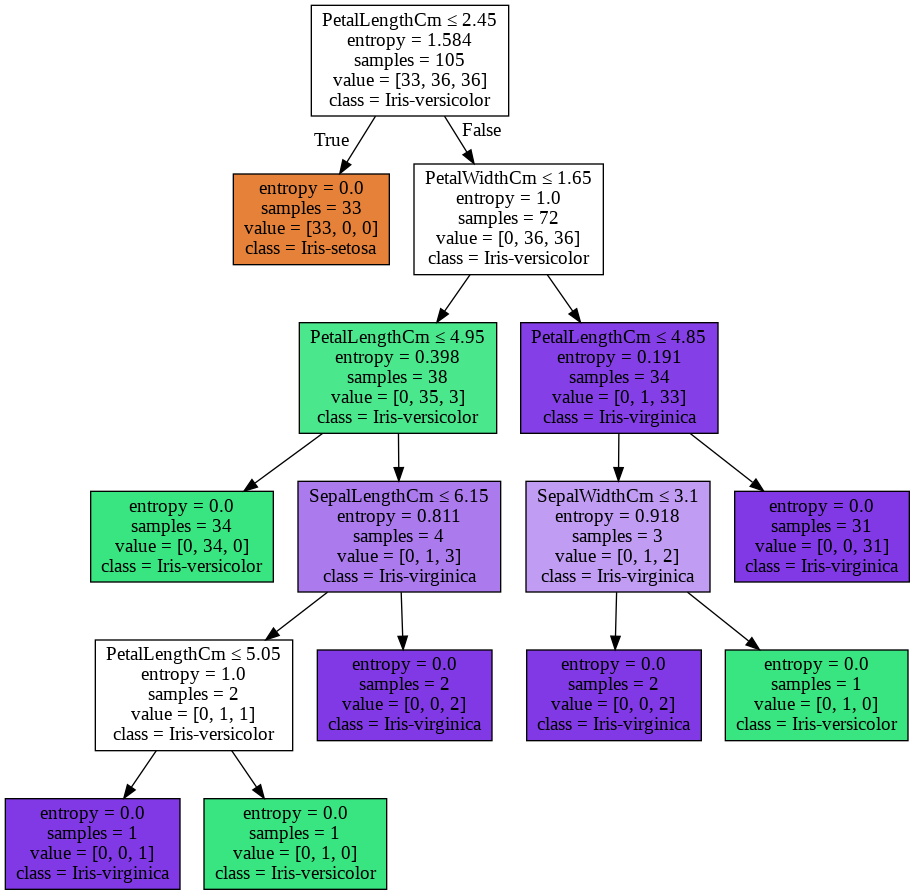

In [14]:
dot_data = StringIO()
filename = "tree.png"
featureNames = data.columns[1:5]
targetNames = data["Species"].unique().tolist()
out = tree.export_graphviz(myTree, feature_names=featureNames, out_file=dot_data, class_names=np.unique(Y_train), filled=True, special_characters=True, rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
img = graph.write_png(filename)
plt.figure(figsize=(100,200))
plt.show(img)
Image(graph.create_png())